# Neighborhood definitions
In py-clEsperanto (and in [CLIJ as well](https://clij.github.io/clij2-docs/md/neighbors_of_neighbors/)), we're using adjacency graphs to investigate relationships between neighboring labeled object, in practice: cells.

This notebook demonstrates the considered neighborhood definitions. 

We consider the "neighborhood" of a pixel always includs the pixel itself per default. That sounds intuitive in the first place and leads to some unnatural behaviour in some situations.

Work is in progress. Feedback is very welcome: robert.haase at tu-dresden.de 

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
import matplotlib
from numpy.random import random

cle.select_device("RTX")

<GeForce RTX 2080 Ti on Platform: NVIDIA CUDA (1 refs)>

In [2]:
# Generate artificial cells as test data
tissue = cle.artificial_tissue_2d()

# fill it with random measurements
values = random([int(cle.maximum_of_all_pixels(tissue))])
for i, y in enumerate(values):
    if (i != 95):
        values[i] = values[i] * 10 + 45
    else:
        values[i] = values[i] * 10 + 90

measurements = cle.push(np.asarray([values]))

# visualize measurments in space
example_image = cle.replace_intensities(tissue, measurements)

## Example data
Let's take a look at an image with arbitrarily shaped pixels. Let's call them "cells". In our example image, there is one cell in the center with higher intensity:

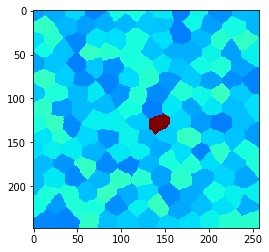

In [3]:
cle.imshow(example_image, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## Touching neighbors
We can show all cells that belong to the "touch" neighborhood by computing the local maximum intensity in this neighborhood. Let's visualize the touching neighbor graph as mesh first.

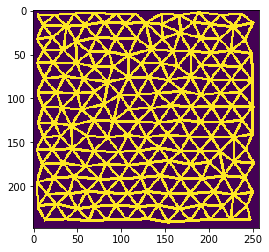

In [4]:
mesh = cle.draw_mesh_between_touching_labels(tissue)

# make lines a bit thicker for visualization purposes
mesh = cle.maximum_sphere(mesh, radius_x=1, radius_y=1)

cle.imshow(mesh)

From those neighbor-graph one can compute local properties, for example the maximum:

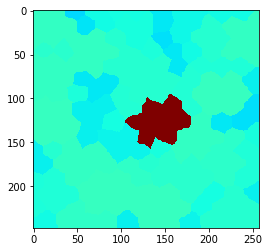

In [5]:
local_maximum = cle.maximum_of_touching_neighbors_map(example_image, tissue)

cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## Neighbors of touching neighbors
You can also extend the neighborhood by considering neighbors of neighbor (of neighbors (of neighbors)). How far you go, can be configured with a radius parameter. Note: Radiu==0 means, no neighbors are taken into account, radius==1 is identical with touching neighbors, radius > 1 are neighbors of neighbors:

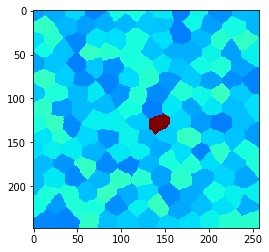

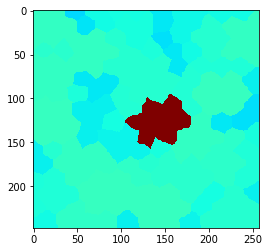

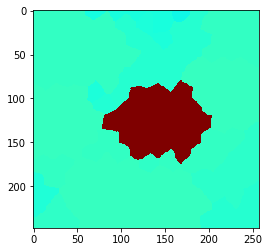

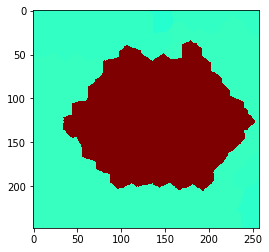

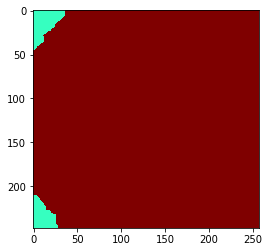

In [6]:
for radius in range(0, 5):
    local_maximum = cle.maximum_of_touching_neighbors_map(example_image, tissue, radius=radius)
    cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## N nearest neighbors
You can also define a neighborhood from the distances between cells. As distance measurement, we use the Euclidean distance between label centroids. Also in this case you an configure how far the neighborhood should range by setting the number of nearest neighbors n. As mentioned above, neighborhoods include the center pixel. Thus, the neighborhood of a pixel and its nearest neighbor contains two neighbors:

n =  1


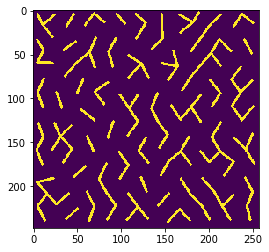

n =  2


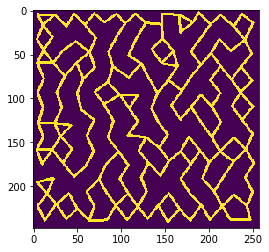

n =  3


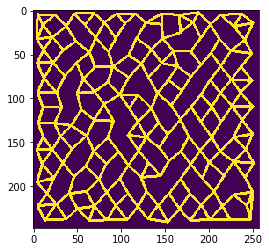

n =  4


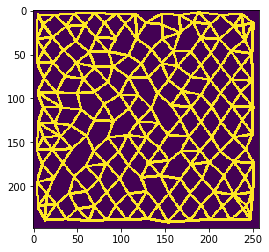

n =  5


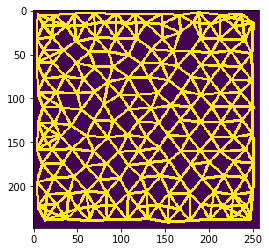

n =  6


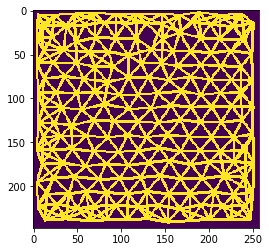

n =  7


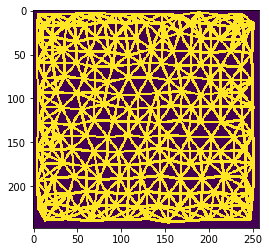

n =  8


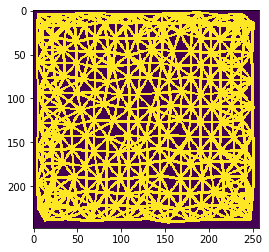

n =  9


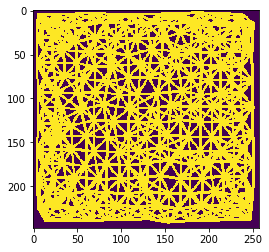

In [7]:
for n in range(1, 10):
    print("n = ", n)
    mesh = cle.draw_mesh_between_n_closest_labels(tissue, n=n)

    # make lines a bit thicker for visualization purposes
    mesh = cle.maximum_sphere(mesh, radius_x=1, radius_y=1)

    cle.imshow(mesh)

n =  1


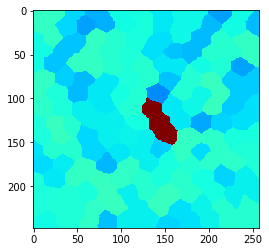

n =  2


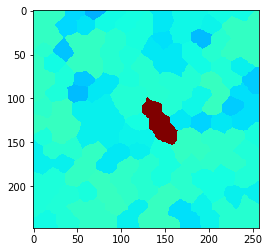

n =  3


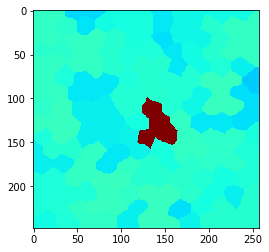

n =  4


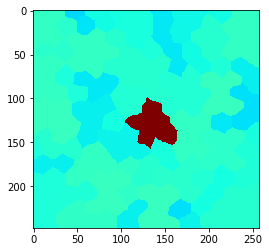

n =  5


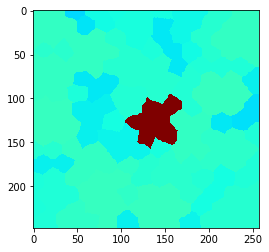

n =  6


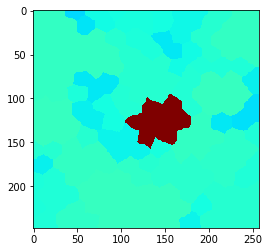

n =  7


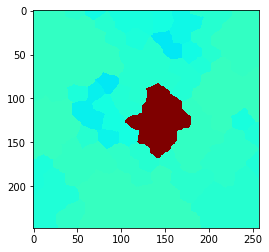

n =  8


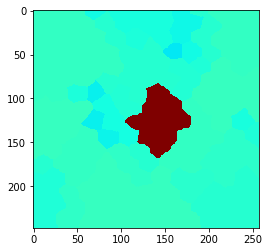

n =  9


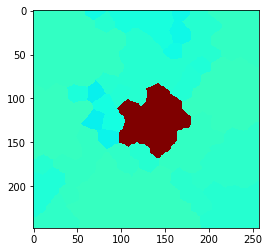

In [8]:
for n in range(1, 10):
    print("n = ", n)

    local_maximum = cle.maximum_of_n_nearest_neighbors_map(example_image, tissue, n=n)
    cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## Proximal neighbors
We can also compute the local maximum of cells with centroid distances below a given upper threshold:

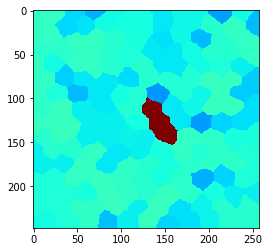

In [9]:
local_maximum = cle.maximum_of_proximal_neighbors_map(example_image, tissue, max_distance=20)
cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

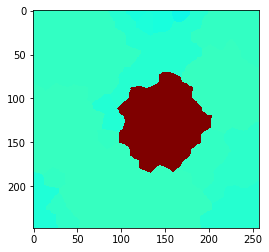

In [10]:
local_maximum = cle.maximum_of_proximal_neighbors_map(example_image, tissue, max_distance=50)
cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')